In [1]:
def get_df(link):    
    """
    Inputs a link to a json/geojson file 
    and returns the dataframe
    """
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)
        print("Retrieving the Dataframe from url.")
        req = requests.get(link).content
        return gpd.read_file(io.StringIO(req.decode('utf-8')))


def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

    
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
    
def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)


def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

In [1]:
import geopandas as gpd

# 文件路径和文件名
file_path_china_al2 = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Bioclimatic&EcologicalZones-20231018T111649Z-002\\Bioclimatic_EcologicalZones\\Global_Ecological_Zone_GEZ\\byCountry\\CHN_AL2_China_GEZ.json'

# 使用 geopandas 的 read_file 函数加载数据
china_gez_al2 = gpd.read_file(file_path_china_al2)

# 显示数据类型和前100行数据
print(type(china_gez_al2))
display(china_gez_al2.head(100))


<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CHN,,China,Boreal coniferous forest,41,Ba,2,"MULTIPOLYGON (((130.74677 48.18124, 130.75225 ..."
1,CHN,,China,Boreal mountain system,43,BM,2,"POLYGON ((120.35734 52.61699, 120.35997 52.620..."
2,CHN,,China,Subtropical humid forest,21,SCf,2,"MULTIPOLYGON (((110.55469 20.88397, 110.55427 ..."
3,CHN,,China,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((105.88057 22.92104, 105.87537 ..."
4,CHN,,China,Temperate continental forest,32,TeDc,2,"MULTIPOLYGON (((119.64767 34.52533, 119.64770 ..."
5,CHN,,China,Temperate desert,34,TeBWk,2,"MULTIPOLYGON (((81.05737 44.10284, 81.03867 44..."
6,CHN,,China,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((119.91135 39.99713, 119.91098 ..."
7,CHN,,China,Temperate steppe,33,TeBSk,2,"MULTIPOLYGON (((123.90427 49.42474, 123.58287 ..."
8,CHN,,China,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((111.20874 15.78631, 111.20804 ..."
9,CHN,,China,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((98.71257 25.90364, 98.70867 25..."


In [2]:
# 导入必要的库
import geopandas as gpd
import matplotlib.pyplot as plt

# 定义函数，用于获取数据框
def get_df(file_path):
    try:
        return gpd.read_file(file_path)
    except Exception as e:
        print(e)
        print("从文件路径中获取数据框。")

# 文件路径
file_path_china = r'C:\Users\BOSS Guan\Desktop\Outreachy\moja\Bioclimatic&EcologicalZones-20231018T111649Z-002\Bioclimatic_EcologicalZones\Global_Ecological_Zone_GEZ\byCountry\CHN_AL2_China_GEZ.json'

# 获取数据框
china_gez_al2 = get_df(file_path_china)

# 显示数据框的类型和前100行
print(type(china_gez_al2))
display(china_gez_al2.head(100))


<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CHN,,China,Boreal coniferous forest,41,Ba,2,"MULTIPOLYGON (((130.74677 48.18124, 130.75225 ..."
1,CHN,,China,Boreal mountain system,43,BM,2,"POLYGON ((120.35734 52.61699, 120.35997 52.620..."
2,CHN,,China,Subtropical humid forest,21,SCf,2,"MULTIPOLYGON (((110.55469 20.88397, 110.55427 ..."
3,CHN,,China,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((105.88057 22.92104, 105.87537 ..."
4,CHN,,China,Temperate continental forest,32,TeDc,2,"MULTIPOLYGON (((119.64767 34.52533, 119.64770 ..."
5,CHN,,China,Temperate desert,34,TeBWk,2,"MULTIPOLYGON (((81.05737 44.10284, 81.03867 44..."
6,CHN,,China,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((119.91135 39.99713, 119.91098 ..."
7,CHN,,China,Temperate steppe,33,TeBSk,2,"MULTIPOLYGON (((123.90427 49.42474, 123.58287 ..."
8,CHN,,China,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((111.20874 15.78631, 111.20804 ..."
9,CHN,,China,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((98.71257 25.90364, 98.70867 25..."


In [4]:
# 导入必要的库
import geopandas as gpd
import matplotlib.pyplot as plt

# 定义函数，用于获取数据框
def get_df(file_path):
    try:
        return gpd.read_file(file_path)
    except Exception as e:
        print(e)
        print("从文件路径中获取数据框。")

# 文件路径
file_path_china = r'C:\Users\BOSS Guan\Desktop\Outreachy\moja\Bioclimatic&EcologicalZones-20231018T111649Z-002\Bioclimatic_EcologicalZones\Global_Ecological_Zone_GEZ\byCountry\CHN_AL2_China_GEZ.json'

# 获取数据框
china_gez_al2 = get_df(file_path_china)

# 显示数据框的类型和前50行
print(type(china_gez_al2))
display(china_gez_al2.head(50))


<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CHN,,China,Boreal coniferous forest,41,Ba,2,"MULTIPOLYGON (((130.74677 48.18124, 130.75225 ..."
1,CHN,,China,Boreal mountain system,43,BM,2,"POLYGON ((120.35734 52.61699, 120.35997 52.620..."
2,CHN,,China,Subtropical humid forest,21,SCf,2,"MULTIPOLYGON (((110.55469 20.88397, 110.55427 ..."
3,CHN,,China,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((105.88057 22.92104, 105.87537 ..."
4,CHN,,China,Temperate continental forest,32,TeDc,2,"MULTIPOLYGON (((119.64767 34.52533, 119.64770 ..."
5,CHN,,China,Temperate desert,34,TeBWk,2,"MULTIPOLYGON (((81.05737 44.10284, 81.03867 44..."
6,CHN,,China,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((119.91135 39.99713, 119.91098 ..."
7,CHN,,China,Temperate steppe,33,TeBSk,2,"MULTIPOLYGON (((123.90427 49.42474, 123.58287 ..."
8,CHN,,China,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((111.20874 15.78631, 111.20804 ..."
9,CHN,,China,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((98.71257 25.90364, 98.70867 25..."


In [5]:
import geopandas as gpd

# 函数定义
def get_df(link):
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)

def column_std(df):
    return df.columns.str.lower()

def clip_df(df_complete, df_n):
    return df_complete.clip(df_n)

# 文件路径
china_file_path = 'C:/Users/BOSS Guan/Desktop/Outreachy/moja/Bioclimatic&EcologicalZones-20231018T111649Z-002/Bioclimatic_EcologicalZones/Global_Ecological_Zone_GEZ/byCountry/CHN_AL2_China_GEZ.json'
liaoning_file_path = 'C:/Users/BOSS Guan/Desktop/Outreachy/moja/Bioclimatic&EcologicalZones-20231018T111649Z-002/Bioclimatic_EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/CHN/CHN_AL4_Liaoning_GEZ.json'

# 分别读取中国的数据和辽宁省的数据
china_gez_al2 = get_df(china_file_path)
liaoning_gez_al4 = get_df(liaoning_file_path)


In [6]:
import json

# 文件路径和文件名
file_path_china_al2 = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Bioclimatic&EcologicalZones-20231018T111649Z-002\\Bioclimatic_EcologicalZones\\Global_Ecological_Zone_GEZ\\byCountry\\CHN_AL2_China_GEZ.json'

# 读取 JSON 文件
with open(file_path_china_al2, 'r') as json_file:
    data = json.load(json_file)

# 提取行名和列名
rows = data.get("features", [])
columns = list(rows[0]["properties"].keys()) if rows else []

# 打印行名和列名
print("行名：")
for row in rows:
    print(row["type"])

print("列名：")
print(columns)


行名：
Feature
Feature
Feature
Feature
Feature
Feature
Feature
Feature
Feature
Feature
Feature
列名：
['country', 'ISO3166_2', 'name', 'gez_name', 'gez_code', 'gez_abbrev', 'adminlevel']


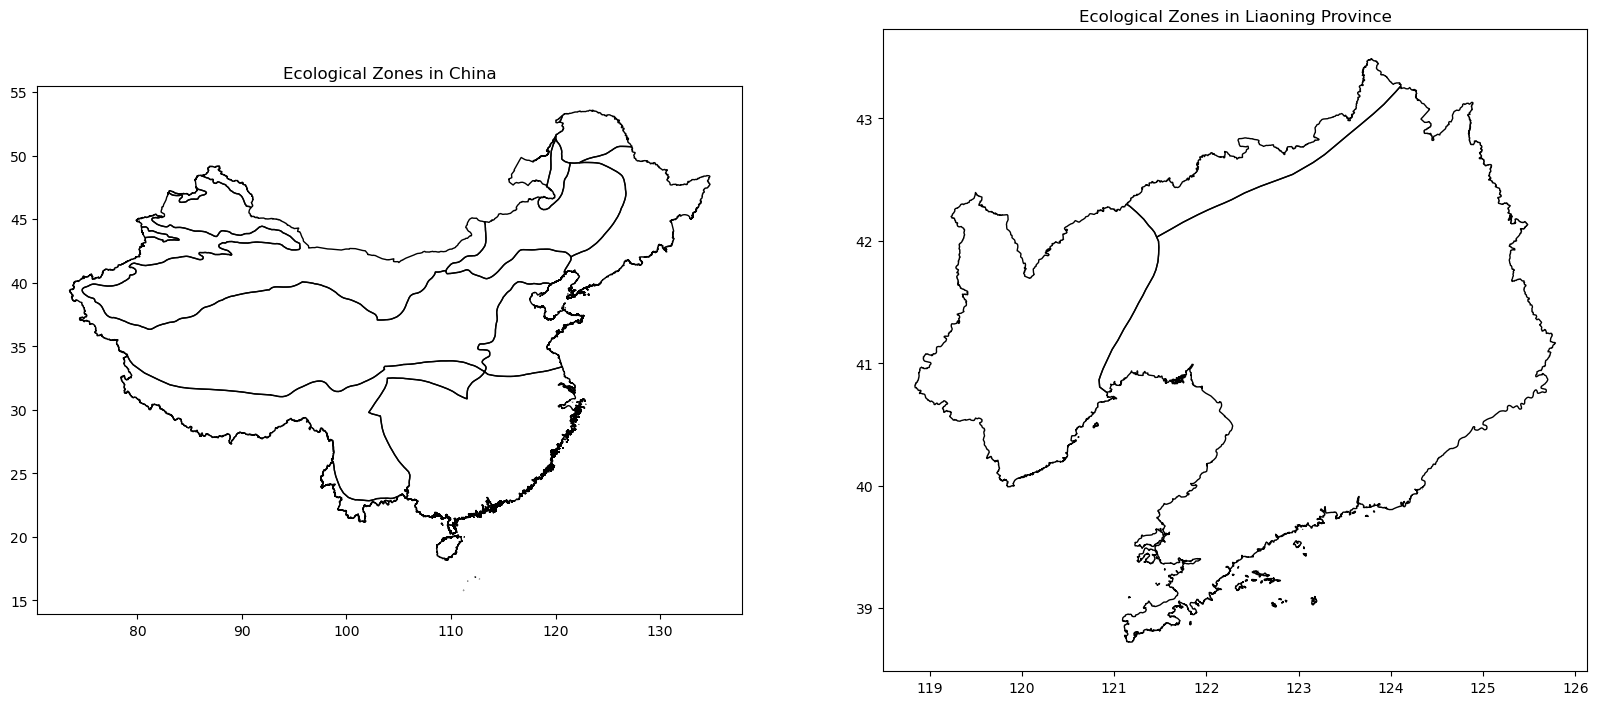

In [10]:
# 导入所需库
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
import io

# 定义一些函数
def get_df(file_path):
    """
    输入文件路径，返回 GeoDataFrame
    """
    try:
        return gpd.read_file(file_path)
    except Exception as e:
        print(e)
        print("尝试从文件路径获取 GeoDataFrame。")
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        return gpd.read_file(io.StringIO(data))

def column_std(df):
    """
    标准化列名
    """
    return df.columns.str.lower()

def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    绘制边界
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def clip_df(df_complete, df_clip):
    """
    裁剪数据集以保留必要的数据
    """
    return df_complete.cx[df_clip.total_bounds]

# 文件路径
file_path_china_al2 = r'C:/Users/BOSS Guan/Desktop/Outreachy/moja/Bioclimatic&EcologicalZones-20231018T111649Z-002/Bioclimatic_EcologicalZones/Global_Ecological_Zone_GEZ/byCountry/CHN_AL2_China_GEZ.json'
file_path_liaoning_al4 = r'C:/Users/BOSS Guan/Desktop/Outreachy/moja/Bioclimatic&EcologicalZones-20231018T111649Z-002/Bioclimatic_EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/CHN/CHN_AL4_Liaoning_GEZ.json'

# 获取 GeoDataFrame
china_gez_al2 = get_df(file_path_china_al2)
liaoning_gez_al4 = get_df(file_path_liaoning_al4)

# 标准化列名
china_gez_al2.columns = column_std(china_gez_al2)
liaoning_gez_al4.columns = column_std(liaoning_gez_al4)

# 可视化数据
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('Ecological Zones in China')
ax2.set_title('Ecological Zones in Liaoning Province')

plot_boundary(china_gez_al2, ax1)
plot_boundary(liaoning_gez_al4, ax2)

plt.show()


In [13]:
# 指定Biodiversity Hotspots文件的路径
bio_hotspot_path = r'C:\Users\BOSS Guan\Desktop\Outreachy\moja\Bioclimatic&EcologicalZones-20231018T111649Z-002\Bioclimatic_EcologicalZones\Global_Ecological_Zone_GEZ\byCountry\CHN_AL2_China_GEZ.json'

# 读取Biodiversity Hotspots文件
bio_hotspot_df = get_df(bio_hotspot_path)
print(type(bio_hotspot_df))
display(bio_hotspot_df.head(100))


<class 'geopandas.geodataframe.GeoDataFrame'>


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CHN,,China,Boreal coniferous forest,41,Ba,2,"MULTIPOLYGON (((130.74677 48.18124, 130.75225 ..."
1,CHN,,China,Boreal mountain system,43,BM,2,"POLYGON ((120.35734 52.61699, 120.35997 52.620..."
2,CHN,,China,Subtropical humid forest,21,SCf,2,"MULTIPOLYGON (((110.55469 20.88397, 110.55427 ..."
3,CHN,,China,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((105.88057 22.92104, 105.87537 ..."
4,CHN,,China,Temperate continental forest,32,TeDc,2,"MULTIPOLYGON (((119.64767 34.52533, 119.64770 ..."
5,CHN,,China,Temperate desert,34,TeBWk,2,"MULTIPOLYGON (((81.05737 44.10284, 81.03867 44..."
6,CHN,,China,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((119.91135 39.99713, 119.91098 ..."
7,CHN,,China,Temperate steppe,33,TeBSk,2,"MULTIPOLYGON (((123.90427 49.42474, 123.58287 ..."
8,CHN,,China,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((111.20874 15.78631, 111.20804 ..."
9,CHN,,China,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((98.71257 25.90364, 98.70867 25..."


In [9]:
# 文件路径和文件名
file_path_china_al2 = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Bioclimatic&EcologicalZones-20231018T111649Z-002\\Bioclimatic_EcologicalZones\\Global_Ecological_Zone_GEZ\\byCountry\\CHN_AL2_China_GEZ.json'

# 使用 geopandas 的 read_file 函数加载数据
china_gez_al2 = gpd.read_file(file_path_china_al2)

# 显示数据的前几行
display(china_gez_al2.head(5))

# 获取行名
rows = china_gez_al2.get("name", [])
print("中国具有以下生态地带数据：")
for row in rows:
    print(row)

# 获取列名
columns = china_gez_al2.columns.tolist()
print("列名：")
for column in columns:
    print(column)


,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CHN,,China,Boreal coniferous forest,41,Ba,2,"MULTIPOLYGON (((130.74677 48.18124, 130.75225 ..."
1,CHN,,China,Boreal mountain system,43,BM,2,"POLYGON ((120.35734 52.61699, 120.35997 52.620..."
2,CHN,,China,Subtropical humid forest,21,SCf,2,"MULTIPOLYGON (((110.55469 20.88397, 110.55427 ..."
3,CHN,,China,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((105.88057 22.92104, 105.87537 ..."
4,CHN,,China,Temperate continental forest,32,TeDc,2,"MULTIPOLYGON (((119.64767 34.52533, 119.64770 ..."


中国具有以下生态地带数据：
China
China
China
China
China
China
China
China
China
China
China
列名：
country
ISO3166_2
name
gez_name
gez_code
gez_abbrev
adminlevel
geometry


In [20]:
# 中国地理数据文件路径
file_path_china_al2 = r'C:\Users\BOSS Guan\Desktop\Outreachy\moja\Bioclimatic&EcologicalZones-20231018T111649Z-002\Bioclimatic_EcologicalZones\Global_Ecological_Zone_GEZ\byCountry\CHN_AL2_China_GEZ.json'

# 辽宁省地理数据文件路径
file_path_liaoning_al4 = r'C:\Users\BOSS Guan\Desktop\Outreachy\moja\Bioclimatic&EcologicalZones-20231018T111649Z-002\Bioclimatic_EcologicalZones\Global_Ecological_Zone_GEZ\byStateGEZ\CHN\CHN_AL4_Liaoning_GEZ.json'

# 获取中国地理数据
china_gez_al2 = get_df(file_path_china_al2)

# 获取辽宁省地理数据
liaoning_gez_al4 = get_df(file_path_liaoning_al4)

# 标准化列名
china_gez_al2.columns = column_std(china_gez_al2)
liaoning_gez_al4.columns = column_std(liaoning_gez_al4)

# 剪裁数据集以保留关于中国的数据
china_geo_df = clip_df(china_gez_al2, china_gez_al2.total_bounds)
china_geo_df = china_geo_df[['name', 'geometry']]

# 剪裁数据集以保留关于辽宁省的数据
liaoning_geo_df = clip_df(liaoning_gez_al4, liaoning_gez_al4.total_bounds)
liaoning_geo_df = liaoning_geo_df[['name', 'geometry']]

print("中国具有以下生态地带数据:")
print(china_geo_df['name'])

print("\n辽宁省具有以下生态地带数据:")
print(liaoning_geo_df['name'])


AttributeError: 'numpy.ndarray' object has no attribute 'total_bounds'

In [11]:
# 文件路径和文件名
file_path_china_bio_hotspot = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Bioclimatic&EcologicalZones-20231018T111649Z-002\\Bioclimatic_EcologicalZones\\Global_Ecological_Zone_GEZ\\byCountry\\CHN_AL2_China_GEZ.json'

# 使用 geopandas 的 read_file 函数加载数据
china_bio_hotspot_df = gpd.read_file(file_path_china_bio_hotspot)

# 输出 GeoDataFrame 的前几行
print(china_bio_hotspot_df.head())

# 获取列名
columns = china_bio_hotspot_df.columns.tolist()
print("列名：")
for column in columns:
    print(column)


  country ISO3166_2   name                      gez_name  gez_code gez_abbrev  \
0     CHN            China      Boreal coniferous forest        41         Ba   
1     CHN            China        Boreal mountain system        43         BM   
2     CHN            China      Subtropical humid forest        21        SCf   
3     CHN            China   Subtropical mountain system        25         SM   
4     CHN            China  Temperate continental forest        32       TeDc   

   adminlevel                                           geometry  
0           2  MULTIPOLYGON (((130.74677 48.18124, 130.75225 ...  
1           2  POLYGON ((120.35734 52.61699, 120.35997 52.620...  
2           2  MULTIPOLYGON (((110.55469 20.88397, 110.55427 ...  
3           2  MULTIPOLYGON (((105.88057 22.92104, 105.87537 ...  
4           2  MULTIPOLYGON (((119.64767 34.52533, 119.64770 ...  
列名：
country
ISO3166_2
name
gez_name
gez_code
gez_abbrev
adminlevel
geometry


In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 中国的数据路径和文件名
file_path_china_al2 = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Bioclimatic&EcologicalZones-20231018T111823Z-002\\Bioclimatic_EcologicalZones\\Global_Ecological_Zone_GEZ\\byCountry\\CHN_AL2_China_GEZ.json'

# 导入中国的数据
china_gez_al2 = gpd.read_file(file_path_china_al2)

# 标准化列名
china_gez_al2.columns = map(str.lower, china_gez_al2.columns)

# 可视化数据
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Ecological Zones in China')
china_gez_al2.plot(column='name', legend=True, cmap='tab20', ax=ax)

plt.show()


DriverError: C:\Users\BOSS Guan\Desktop\Outreachy\moja\Bioclimatic&EcologicalZones-20231018T111823Z-002\Bioclimatic_EcologicalZones\Global_Ecological_Zone_GEZ\byCountry\CHN_AL2_China_GEZ.json: No such file or directory

In [14]:
!pip install geopandas matplotlib


ERROR: Could not find a version that satisfies the requirement geopandas (from versions: none)
ERROR: No matching distribution found for geopandas

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install geopandas matplotlib


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 定义中国行政边界的文件路径
china_boundary_file = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Administrative-20231019T110829Z-002\\Administrative\\Boundaries\\CHN_AL2_China.json'

# 定义辽宁省生态地带数据文件路径
liaoning_gez_file = 'C:\\Users\\BOSS Guan\\Desktop\\Outreachy\\moja\\Bioclimatic&EcologicalZones-20231018T111649Z-002\\Bioclimatic_EcologicalZones\\Global_Ecological_Zone_GEZ\\byStateGEZ\\CHN\\CHN_AL4_Liaoning_GEZ.json'

# 读取中国行政边界数据
china_boundary = gpd.read_file(china_boundary_file)

# 读取辽宁省生态地带数据
liaoning_gez = gpd.read_file(liaoning_gez_file)

# 可视化中国的行政边界
china_boundary.plot()
plt.title('Administrative Boundary of China')
plt.show()

# 可视化辽宁省的生态地带数据
liaoning_gez.plot()
plt.title('Ecological Zones in Liaoning Province')
plt.show()


In [4]:
#Import the necessary libraries:
import geopandas as gpd
import matplotlib.pyplot as plt

#Define the paths to files:
# Path to the CHN_ALL_states_WSR.json file
chn_forest_path = r'D:\Outreachy\moja\Administrative-20231019T110829Z-005\Administrative\Boundaries\Level4 by State\CHN\CHN_ALL_states_WSR.json'

# Path to the CHN_AL4_Anhui_GEZ.json file
anhui_gez_path = r'D:\Outreachy\moja\Administrative-20231019T110829Z-005\Administrative\Boundaries\Level4 by State\CHN\CHN_AL4_Anhui_GEZ.json'

#Read the GeoDataFrames from the files:
# Read the GeoDataFrame for CHN_ALL_states_WSR
chn_forest_df = gpd.read_file(chn_forest_path)

# Read the GeoDataFrame for CHN_AL4_Anhui_GEZ
anhui_gez_df = gpd.read_file(anhui_gez_path)

#Plot the data:
# Plotting the forest cover for CHN
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_title('Forest Cover in China')
chn_forest_df.plot(ax=ax1, legend=True)
plt.show()

# Plotting the forest cover for Anhui
fig, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_title('Forest Cover in Anhui')
anhui_gez_df.plot(ax=ax2, legend=True)
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [5]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement geopandas (from versions: none)
ERROR: No matching distribution found for geopandas


In [6]:
pip install /path/to/geopandas-<version>-py3-none-any.whl



SyntaxError: invalid syntax (3860597249.py, line 1)

In [1]:
# 导入必要的库
import geopandas as gpd
import matplotlib.pyplot as plt

# 定义用于处理数据的函数
def get_df(link):
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)

def plot_boundary(df, ax, color='none', edgecolor='black'):
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)

def clip_df(df_complete, df_n):
    return df_complete.cx[df_n.total_bounds]

def column_std(df):
    return df.columns.str.lower()

# 获取中国的行政边界数据
chn_boundary_links = [
    'D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level2 by Country/CHN/CHN_AL2_China.json',
    'D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level2 by Country/CHN/CHN_AL2_China_GEZ.json',
    'D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level2 by Country/CHN/CHN_AL2_ China_WSR.json'
]

chn_boundaries = [get_df(link) for link in chn_boundary_links]

# 选择要绘制的列
chn_boundaries = [boundary[['name', 'geometry']] for boundary in chn_boundaries]

# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 设置子图标题
titles = ['CHN_AL2_China', 'CHN_AL2_China_GEZ', 'CHN_AL2_ China_WSR']

# 绘制中国的边界
for i in range(3):
    axs[i].set_title('ADMINISTRATIVE BOUNDARY - ' + titles[i])
    plot_boundary(chn_boundaries[i], axs[i])

# 显示地图
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [4]:
# 导入所需的库
import geopandas as gpd
import pandas as pd

# Administrative Boundaries of China and Anhui
chn_bound = 'file:///D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level2 by Country/CHN/CHN_AL2_China.json'
chn_bound_all = 'file:///D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level2 by Country/CHN/CHN_AL2_China_GEZ.json'
la_bound = 'file:///D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level4 by State/CHN/CHN_AL4_Anhui_GEZ.json'

# 从文件中读取中国行政边界数据
chn_boundary = gpd.read_file(chn_bound)
chn_all = gpd.read_file(chn_bound_all)
la_boundary = gpd.read_file(la_bound)

# 显示数据框的类型和内容
print(type(chn_boundary))
display(chn_boundary)


DriverError: '/D:/Outreachy/moja/Administrative-20231019T110829Z-005/Administrative/Boundaries/Level2 by Country/CHN/CHN_AL2_China.json' does not exist in the file system, and is not recognized as a supported dataset name.